This is to generate the relevant data from the exact diagonalziation that I myself coded

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import h5py
import json
import matplotlib 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import sys  

from ast import literal_eval

from qutip import  *

sys.path.append('../../scripts') 

from qutip_tools import *

In [18]:
# define basic figure sizes
bwidth=7
bheight=5
base_font = 20

matplotlib.rcParams.update({'font.size': base_font,"legend.fontsize":base_font-4 ,"font.family": "serif", 
                            "font.serif": "CMU Serif, Times New Roman",
                           'text.usetex' : True })

sns.set_palette("colorblind")

fig_route = "../plots/QPC_double_dot/"


In [19]:
data_route = "../../data/exact_diag_new/L=40/"

J=1


# Checking correct initial condition

In [20]:
# file_list = get_file_names_on(["om0.1","bw2.0","t0.1", "dd0fixed"], data_route)
file_list = get_file_names_on(["om0.0","Del4.0","t0.1"], data_route)

file_list

['exact_L40_J1.0_t0.1_om0.0_Del4.0_xo5_k0.7854_bindex20_maxtau70.000_tstep0.140_alpha0.215_beta0.785_phi0.0.h5',
 'exact_L40_J1.0_t0.1_om0.0_Del4.0_xo5_k1.2566_bindex20_maxtau70.000_tstep0.140_alpha0.348_beta0.652_phi0.0.h5',
 'exact_L40_J1.0_t0.1_om0.0_Del4.0_xo5_k1.0996_bindex20_maxtau70.000_tstep0.140_alpha0.313_beta0.687_phi0.0.h5',
 'exact_L40_J1.0_t0.1_om0.0_Del4.0_xo5_k1.4137_bindex20_maxtau70.000_tstep0.140_alpha0.368_beta0.632_phi0.0.h5',
 'exact_L40_J1.0_t0.1_om0.0_Del4.0_xo5_k0.6283_bindex20_maxtau70.000_tstep0.140_alpha0.210_beta0.790_phi0.0.h5',
 'exact_L40_J1.0_t0.1_om0.0_Del4.0_xo5_k1.5708_bindex20_maxtau70.000_tstep0.140_alpha0.375_beta0.625_phi0.0.h5']

Text(0.5, 0, 'Time')

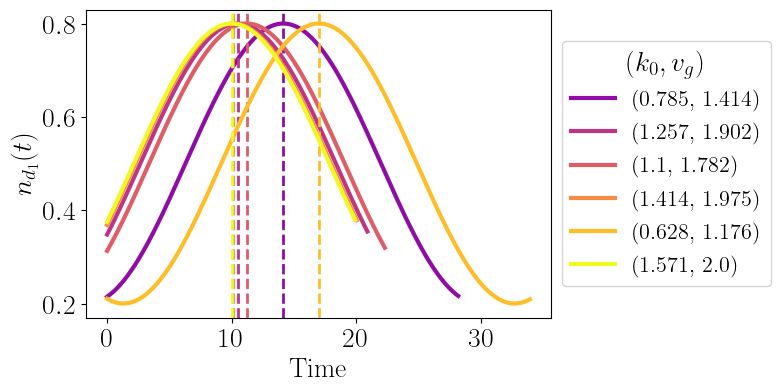

In [21]:
colors = plt.cm.plasma(np.linspace(0.3,1,len(file_list)))

fig, ax = plt.subplots(figsize=(6,4))

for i in range(0,len(file_list)):
    file_name = file_list[i]
    param_dict, times, occupations, d0_density, qubit_rho, entropy = load_exact_diag(data_route, file_name)  
  
    # calculate the time it takes it to hit the bond (scattering approx)
    vg = 2*np.sin(param_dict["K0"])
    tau_to_bond = param_dict["bond_index"]/vg
    
    lab = "("+str(round(param_dict["K0"],3)) + ", " + str(round(vg,3))+")" 
    
    plt.plot(times, d0_density, linewidth=3, label=lab , c=colors[i])
    
    plt.axvline(tau_to_bond, linestyle="dashed",c=colors[i], linewidth=2)
    
plt.legend(title=r"$(k_0, v_g)$",loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel(r"$n_{d_1}(t)$")
plt.xlabel(r"Time")

